# Customer Service Staffing using Poisson Distribution

Consider a customer call center which works 24*7 and answers to customer queries.
The call center recieves 'n' number of calls which are of different length.
Some calls need more than 10 minutes to handle. 
Due to this longer duration calls other customers might need to be on hold as the agents are busy.
Let's consider an interval of 1 hour and the average number of 10 minute calls per hour is 6.
In this case lambda λ = 6/hour
Using poisson distribution lets find the maximum number of 10 minute calls we can expect in an hour.

In [18]:
import pandas as pd
import numpy as np
from scipy.special import factorial

events_per_minute = 1/10
minutes = 60

# Expected events
lam = events_per_minute * minutes

k = 3
p_k = np.exp(-lam) * np.power(lam, k) / factorial(k)
print(f'The probability of {k} calls in {minutes} minutes is {100*p_k:.2f}%.')

The probability of 3 calls in 60 minutes is 8.92%.


We can do the same calculation by simulating 10,000 hours.

In [19]:
np.random.seed(42)

In [20]:
x = np.random.poisson(lam, 10000)
(x == 3).mean()*100

9.379999999999999

Let's plot the distribution for different values of number of calls to get an estimation for staffing.

<AxesSubplot:>

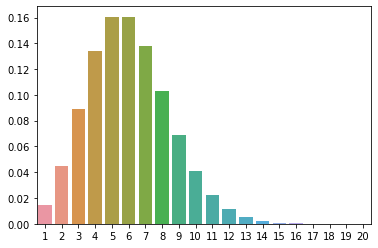

In [21]:
import seaborn as sns
number_of_calls=np.arange(1,21)
events_per_minute = 1/10
minutes = 60

# Expected events
lam = events_per_minute * minutes

def cal_prob(k):
    return(np.exp(-lam) * np.power(lam, k) / factorial(k))

probabilities=[]
for call in number_of_calls:
    probabilities.append(cal_prob(call))

sns.barplot(x=number_of_calls,y=probabilities)

As per the plot we can see maximum number of calls that is expected value E[x] is 6.
So at any hour the customer service center must have minimum 6 agents available so that other customers need not be on hold.

# Using Poisson distribution to find if its financially viable to keep a store open 24 hours a day

Let's consider a supermaket that is open 24*7.

The store employees 2 employees for every shift.

Shift timings include : 8 am - 4pm, 4pm-12pm, 12pm- 8am

For each shift 2 employees work at the store with a monthly salary of 12000 INR.

## Store electricity consumption:


Consider the store has- 


1) 10 Fans : An average size ceiling fan has rated power of 70 watts and for 8 hours of operation they consumes 0.56 kWh of power.

2) 14 Tubelights of 40 watts each : 40 watts of power over 8 hours amounts to 8 x 40 = 320 watt-hours of energy, or 320/1000 = .32 kilowatt-hour (kwh) of energy.

3) 2 commercial refrigerator 300 watts each: 300 watts of power over 8 hours amounts to 8 x 300 = 2400 watt-hours of energy, or 2400/1000 = 2.4 kilowatt-hour (kwh) of energy.

4) Billing computer and other small electric appliances:  30 watts of power over 8 hours amounts to 8 x 30 = 240 watt-hours of energy, or 240/1000 = 0.24 kilowatt-hour (kwh) of energy.


Enery consumption calculation:

|Consumer Category & Consumption Slab | Energy Charge (Rs/kWh)  | 
| --- | --- | 
| 0-100 |  4.67 |
| 101-300	 |  6.02 |
| 301-500 |  7.15 |
| 500 and above | 8.90|

Electricy cost as per appliances:

    1) Fans = 0.56*10*4.67 = 26.152 INR
    2) Tubelights = 14*0.32*4.67 = 20.9216 INR
    3) Commercial refrigerators = 2.4*2*4.67 = 22.41 INR
    4) Billing computer and other small electric appliances = 0.24 * 4.67 = 1.12 INR
    
Overall cost = 70.602 INR

Employee cost for 8 hour midnight shift:

Monthly salary = 12000 INR

Per day salary = 400

For 2 employees= 800 INR

### Overall cost of store for a shift = 800 + 70.602 = 870.6 INR

So for the supermarket to be in profit they need to cover the minimum cost of 870.6 INR in every shift and also earn resonable profit from the sales.

Each shift will have different average sales as the number of customers varies as per the time.

The supermarket will be definetely kept opened for the 1st 2 shifts, the main question arises that is it viable to keep the store open at night time as well. As generally the sales will be less during the night shift.

Consider the average sales of the store at night is 8000 INR. (Just an assumption)

The profit margin for the grocery stores in India ranges from 2% to 20%.

Let's assume that the supermarket makes a 11% profit for every sale.

This percentage may vary with different items but let's consider an average of 11%.

So, considering the sales of 8000 INR, 11% will be 880 INR.



### According to this scenario the store makes an overall profit of 880-870 = 10 INR for the night shift.

This will be valid if the store makes minimum sales of 8500 INR every night.

Using poisson distribution let's find out what is the minimum sales the store can make.

Here the lambda (λ) = 8000, as this value is greater than 20 so we could use the normal approximation to poisson distribution.

### Normal approximation to poisson distribution

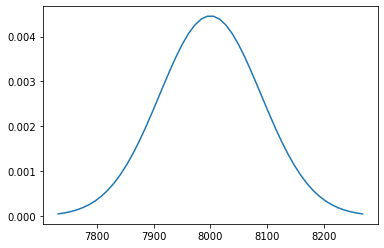

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 8000
variance = 8000
std = math.sqrt(variance)
x = np.linspace(mu - 3*std, mu + 3*std)
plt.plot(x, stats.norm.pdf(x, mu, std))
plt.show()


Using the above approximation we will find out the probability of the minimum sales required in order to cover the overall cost of the supermarket.

The supermarket requires a minimum profit of 870 INR to cover its cost for the midnight shift.

So, with the profit margin of 11% on sales, the supermarket needs to sale items worth 7909 INR.

## Calculating probability that the store makes minimum 7909 INR

Using normal distribution it is difficult to calculate the exact probability that the supermarket makes 7909 INR, so we need to convert the distribution to Standard Normal Distribution with a μ = 0 and σ = 1

We can do this using Z score:
$$ Z = (X(i) - μ) / σ $$

Here, we need to apply continuity correction as we are approximationg Poisson to normal distribution.

We need to find P(X>=7909) -> P(X > 7908.5) , according to continuity correction rules.

So, Z score for :

P( X > 7908.5) = P( Z > ((7908.5 - 8000)/89.44)) = P( Z > -1.02) = P( Z < 1.02) = 0.8461

There is 84.61% chance that the supermarket will be able to cover its cost.

So it is viable for the supermarket to be open at night as well as it has high probability that it can cover its overall cost and gain profit as well.

### Conclusion 

Using above calculation we can find out the probabilities of different profit margins that the supermarket can make.

This is the business application of Poisson Distribution